In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# load data
boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['y'])
data = pd.concat([X, y], axis=1)

#
1. boston 데이터에 column 중 하나인 LSTAT와 y의 선형회귀 수행
2. 위 회귀분석의 r2 score와 mean_squared_error 출력
3. 회귀선과 LSTAT와 y의 산점도를 한 그래프에 시각화
4. LSTAT와의 피어슨 상관계수 절대값이 가장 낮은 column 찾기
5. 4번에서 찾은 column + LSTAT와 y의 다중회귀 수행
6. 위 회귀분석의 r2 score와 mean_squared_error 출력하고, 2번의 결과와 비교

In [4]:
y = y.values
y.shape
y = y.reshape(-1,1)
y.shape
X1 = X['LSTAT']
X1 = np.array(X1).reshape(-1,1)

#1
model1 = LinearRegression()
model1.fit(X1,y)

coef = model1.coef_
intercept = model1.intercept_
print(intercept, coef)

[34.55384088] [[-0.95004935]]


In [5]:
#2
predict_y = model1.predict(X1)
res = y-predict_y
MSE = mean_squared_error(y , predict_y)
R = r2_score(y , predict_y)
print('MSE : ', MSE)
print('R squared : ', R)

MSE :  38.48296722989414
R squared :  0.5441462975864799


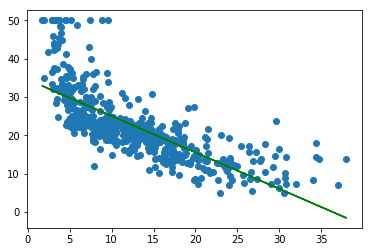

In [9]:
#3
plt.scatter(X1, y)
plt.plot(X1, predict_y, color = 'green')
plt.show()

In [11]:
cor.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879


In [10]:
#4
cor = X.corr(method = 'pearson')
np.abs(cor)['LSTAT'].argmin()

C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  This is separate from the ipykernel package so we can avoid doing imports until


'CHAS'

In [13]:
#5
X2 = X[['LSTAT','CHAS']]

model2 = LinearRegression()
model2.fit(X2,y)
inter = model2.intercept_
coef2 = model2.coef_
print(inter, coef2)

[34.09411533] [[-0.94061204  4.91997644]]


In [14]:
#6
predict_y2 = model2.predict(X2)
MSE2 = mean_squared_error(y, predict_y2)
R2 = r2_score(y, predict_y2)
print('MSE : ', MSE2)
print('R squared : ', R2)

MSE :  36.928974315479216
R squared :  0.5625542706341021
